In [2]:
import nixtla as nx
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsforecast import StatsForecast
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [4]:
df = pd.read_csv("all_scaled_1750-2022.csv")
emissions = df.iloc[0,(5 + (1840 - 1750)):] # cutting off everything before the end of the industrial revolution
emissions = emissions.astype('float64')
emissions = emissions.to_frame(name='y')

In [5]:
emissions.index = emissions.index.astype('float64')
transformed_emissions = np.log(emissions/2.4)

In [6]:
curr = transformed_emissions.iloc[:-1]
next = transformed_emissions.iloc[1:]
next.index = next.index - 1
diff = next - curr

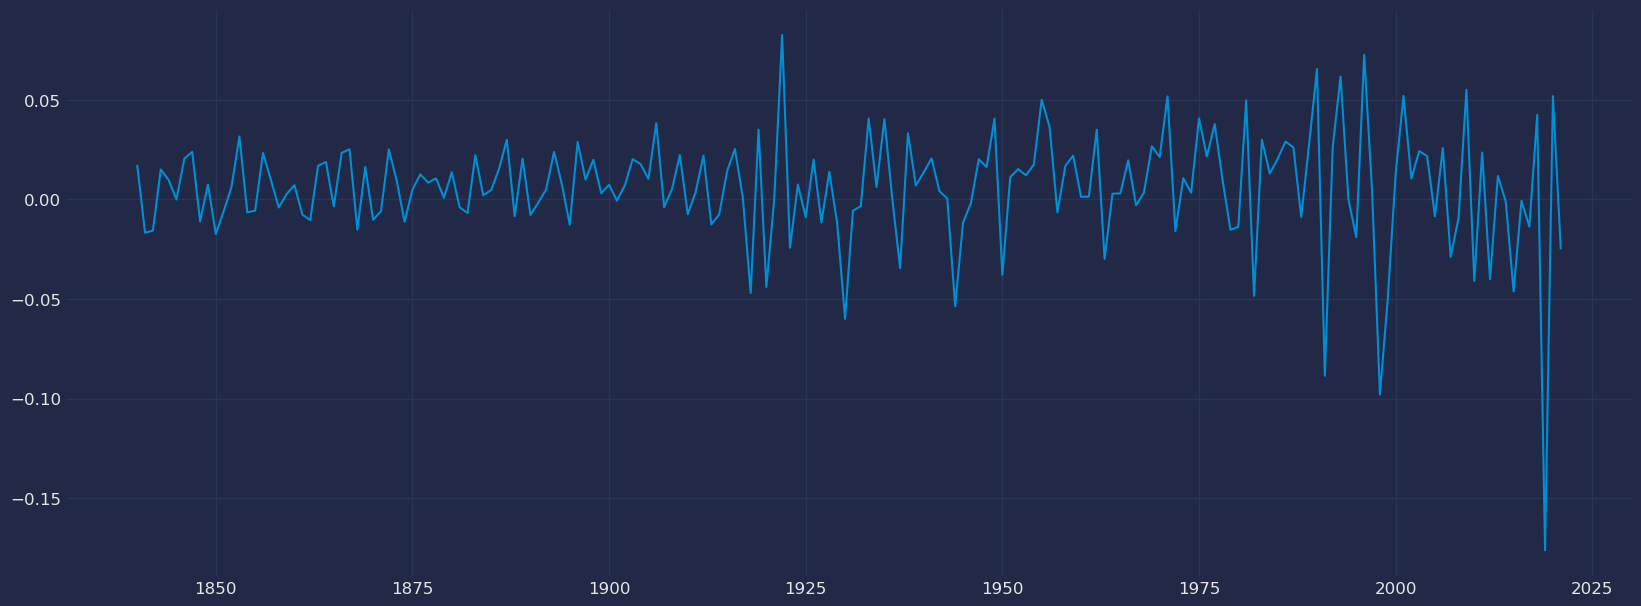

In [7]:
plt.plot(diff)
plt.show()

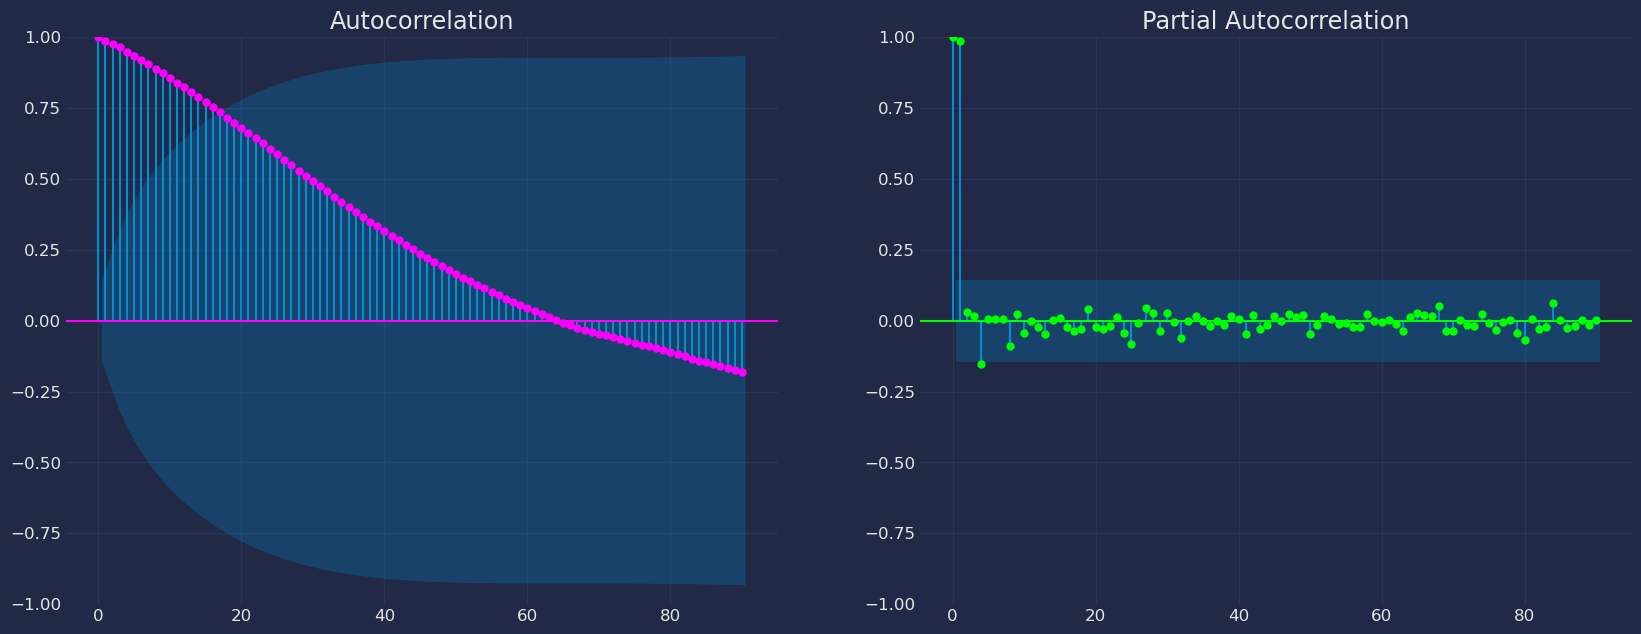

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)

plot_acf(transformed_emissions, lags=90, ax = axs[0], color="fuchsia")
axs[0].set_title('Autocorrelation')

plot_pacf(transformed_emissions, lags=90, ax = axs[1], color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show()

In [9]:
df = pd.DataFrame(columns = ['ds', 'y', 'unique_id'])
date_stamps = pd.to_datetime(transformed_emissions.index, format='%Y')
df['y'] = transformed_emissions
df['ds'] = date_stamps
df['unique_id'] = 'BC'

In [10]:
df

,ds,y,unique_id
1840.0,1840-01-01,0.017438,BC
1841.0,1841-01-01,0.034765,BC
1842.0,1842-01-01,0.018008,BC
1843.0,1843-01-01,0.002309,BC
1844.0,1844-01-01,0.017322,BC
...,...,...,...
2018.0,2018-01-01,1.133965,BC
2019.0,2019-01-01,1.176324,BC
2020.0,2020-01-01,1.000175,BC
2021.0,2021-01-01,1.051979,BC


In [36]:
models = [AutoARIMA(max_p = 1)]
# models = [ARIMA(order = (1,1,0))]
sf = StatsForecast(df=df,
                   models=models,
                   freq='AS', 
                   n_jobs=-1)

/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [37]:
sf.fit()

/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [38]:
result=sf.fitted_[0,0].model_

In [39]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
# residual

In [40]:
forecast_df = sf.predict(h=12, level = [80, 95])

/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [41]:
forecast_df

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
unique_id,,,,,,
BC,2023-01-01,1.025314,0.969399,0.988753,1.061874,1.081228
BC,2024-01-01,1.019292,0.949100,0.973396,1.065187,1.089483
BC,2025-01-01,1.013400,0.930218,0.959010,1.067790,1.096583
BC,2026-01-01,1.007638,0.912197,0.945233,1.070043,1.103078
BC,2027-01-01,1.002001,0.894761,0.931881,1.072121,1.109241
BC,2028-01-01,0.996487,0.877752,0.918850,1.074123,1.115222
BC,2029-01-01,0.991093,0.861072,0.906077,1.076109,1.121114
BC,2030-01-01,0.985817,0.844658,0.893518,1.078116,1.126976
BC,2031-01-01,0.980656,0.828463,0.881142,1.080169,1.132848


In [42]:
df_plot=pd.concat([df, forecast_df]).set_index('ds').tail(220)
df_plot

,y,unique_id,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
ds,,,,,,,
1840-01-01,0.017438,BC,NaN,NaN,NaN,NaN,NaN
1841-01-01,0.034765,BC,NaN,NaN,NaN,NaN,NaN
1842-01-01,0.018008,BC,NaN,NaN,NaN,NaN,NaN
1843-01-01,0.002309,BC,NaN,NaN,NaN,NaN,NaN
1844-01-01,0.017322,BC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2030-01-01,NaN,NaN,0.985817,0.844658,0.893518,1.078116,1.126976
2031-01-01,NaN,NaN,0.980656,0.828463,0.881142,1.080169,1.132848
2032-01-01,NaN,NaN,0.975607,0.812458,0.868929,1.082285,1.138757


/tmp/ipykernel_3780/1081341855.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")


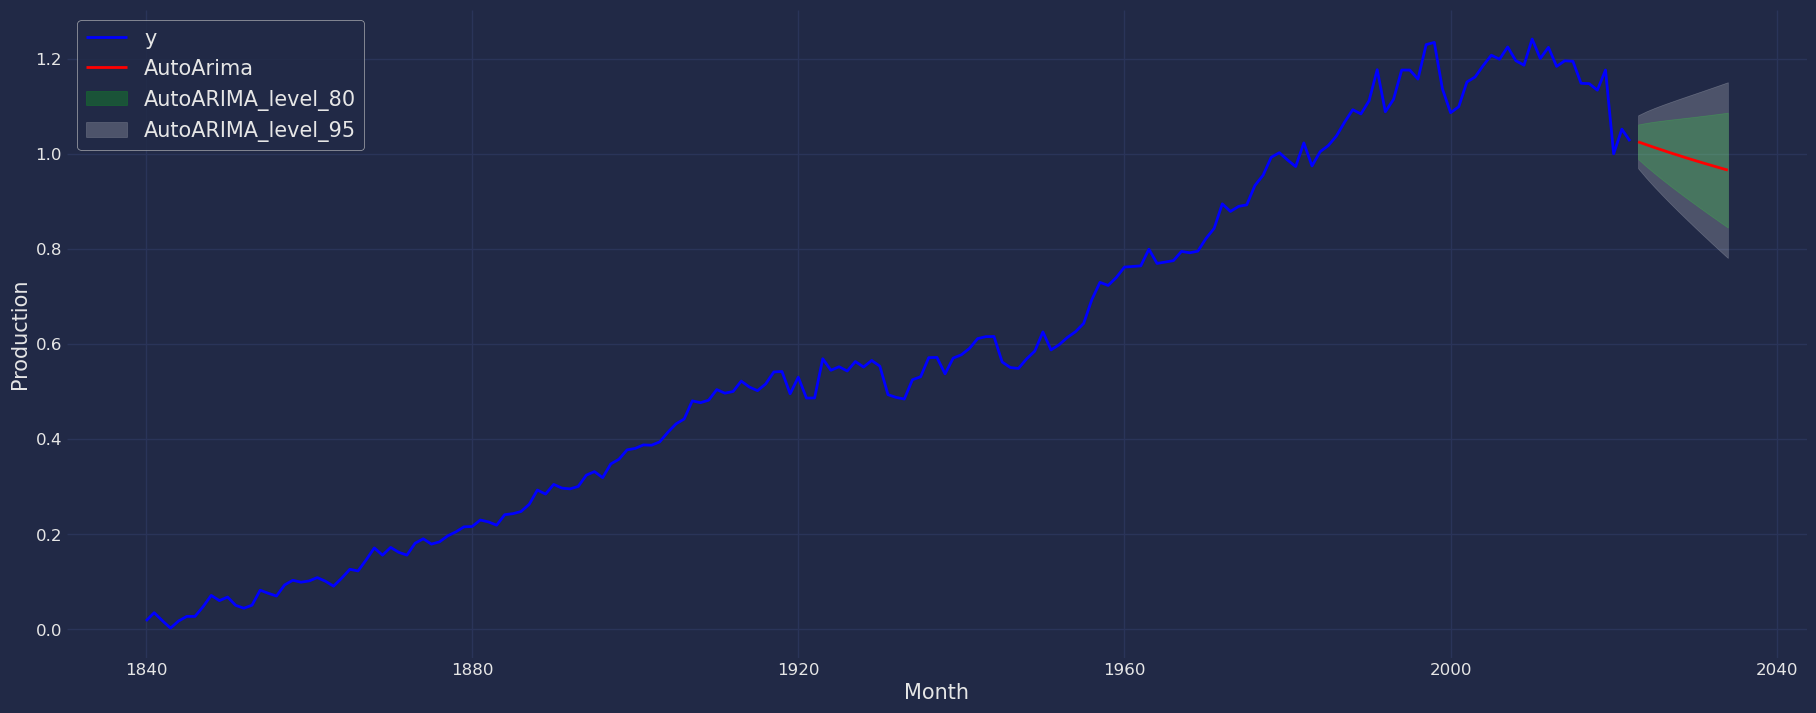

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

plt.plot(df_plot['y'], 'b-', linewidth=2 ,label="y")
plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")

# Specify graph features:
ax.fill_between(df_plot.index, 
                df_plot['AutoARIMA-lo-80'], 
                df_plot['AutoARIMA-hi-80'],
                alpha=.20,
                color='lime',
                label='AutoARIMA_level_80')
ax.fill_between(df_plot.index, 
                df_plot['AutoARIMA-lo-95'], 
                df_plot['AutoARIMA-hi-95'],
                alpha=.2,
                color='white',
                label='AutoARIMA_level_95')
ax.set_title('', fontsize=20)
ax.set_ylabel('Production', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()


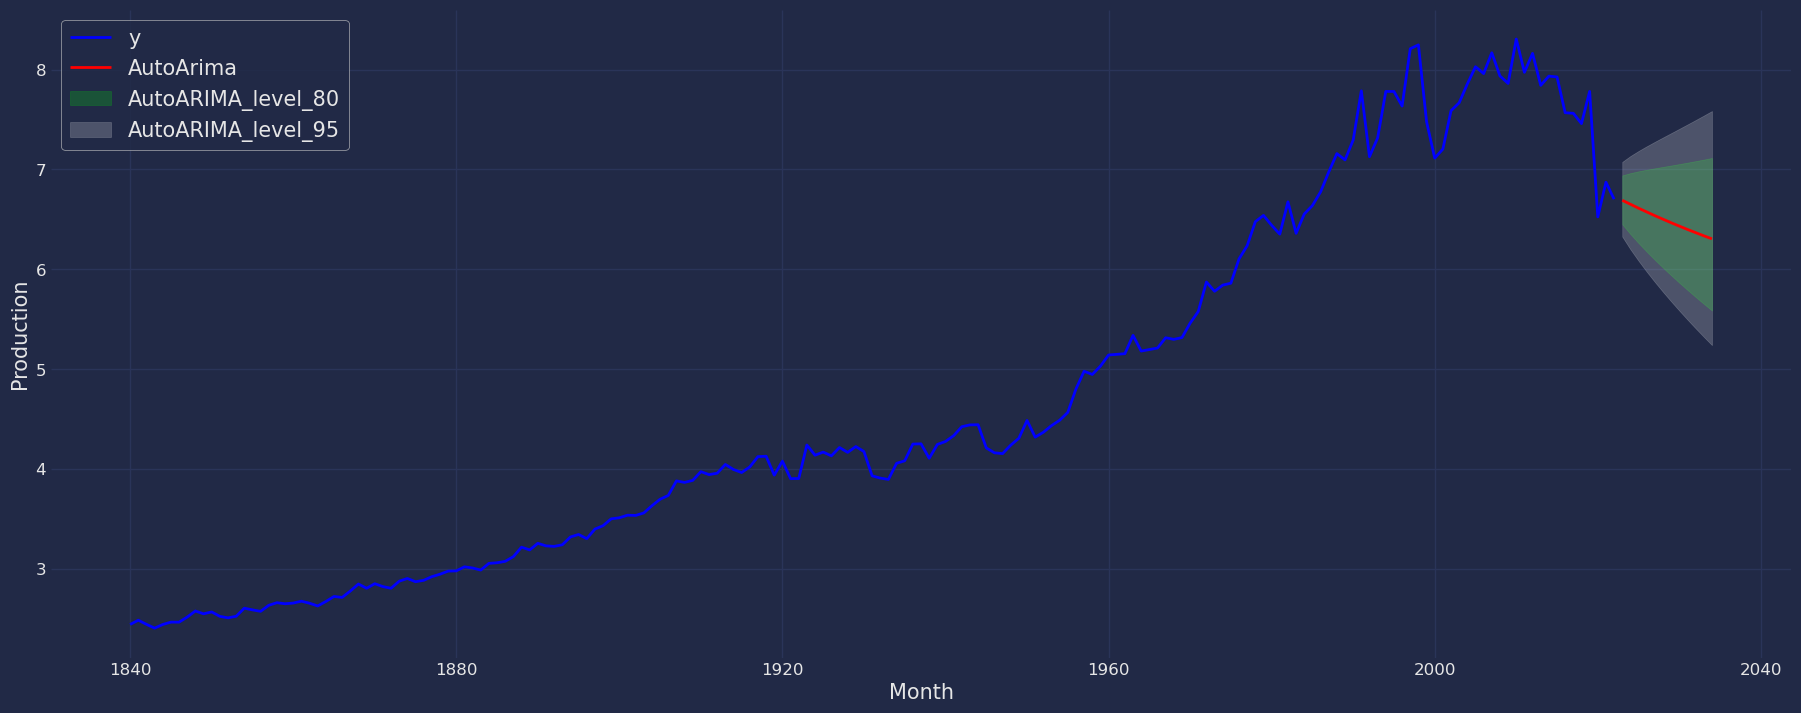

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

plt.plot(2.4*np.exp(df_plot['y']), 'b-', linewidth=2 ,label="y")
plt.plot(2.4*np.exp(df_plot['AutoARIMA']), 'r-',linewidth=2, label="AutoArima")

# Specify graph features:
ax.fill_between(df_plot.index, 
                2.4*np.exp(df_plot['AutoARIMA-lo-80']), 
                2.4*np.exp(df_plot['AutoARIMA-hi-80']),
                alpha=.20,
                color='lime',
                label='AutoARIMA_level_80')
ax.fill_between(df_plot.index, 
                2.4*np.exp(df_plot['AutoARIMA-lo-95']), 
                2.4*np.exp(df_plot['AutoARIMA-hi-95']),
                alpha=.2,
                color='white',
                label='AutoARIMA_level_95')
ax.set_title('', fontsize=20)
ax.set_ylabel('Production', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()


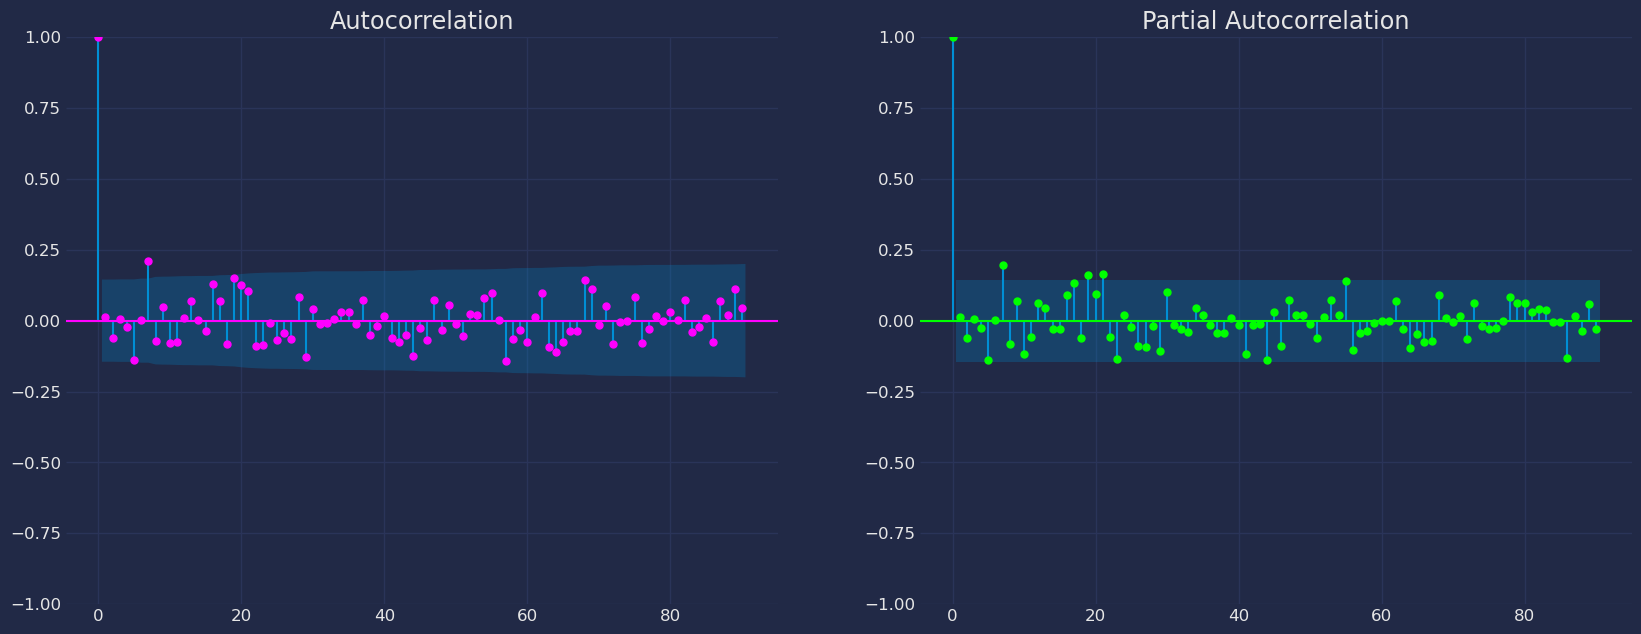

In [45]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)

plot_acf(residual, lags=90, ax = axs[0], color="fuchsia")
axs[0].set_title('Autocorrelation')

plot_pacf(residual, lags=90, ax = axs[1], color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show()

In [1]:
arima_string(sf.fitted_[0,0].model_)

NameError: name 'arima_string' is not defined

In [ ]:
corr_value =